# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

trial_data = []
city_counter = 1

for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json() 
    try:
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        print(f'Processing Record {city_counter} | {city}')
        trial_data.append([city, city_lat, city_lng, max_temp, humidity, cloudiness, wind_speed, country, date])
        city_counter += 1
    except KeyError:
        print("City not found. Skipping...")


Processing Record 1 | saskylakh
City not found. Skipping...
Processing Record 2 | yellowknife
Processing Record 3 | kaseda
Processing Record 4 | mar del plata
Processing Record 5 | azul
Processing Record 6 | busselton
Processing Record 7 | castro
Processing Record 8 | albany
Processing Record 9 | hilo
Processing Record 10 | kanigoro
Processing Record 11 | vila franca do campo
Processing Record 12 | barrow
Processing Record 13 | puerto ayora
Processing Record 14 | hermanus
Processing Record 15 | tuktoyaktuk
Processing Record 16 | sulina
Processing Record 17 | prince rupert
Processing Record 18 | clyde river
Processing Record 19 | sekoma
Processing Record 20 | bethel
Processing Record 21 | rikitea
Processing Record 22 | tateyama
City not found. Skipping...
Processing Record 23 | saint george
Processing Record 24 | vaini
Processing Record 25 | cape town
Processing Record 26 | hofn
Processing Record 27 | bom jesus
Processing Record 28 | okhotsk
Processing Record 29 | gimli
Processing Recor

Processing Record 231 | novosokolniki
Processing Record 232 | nanortalik
Processing Record 233 | khatanga
Processing Record 234 | mont-de-marsan
Processing Record 235 | olinda
Processing Record 236 | ashland
Processing Record 237 | eureka
Processing Record 238 | usinsk
Processing Record 239 | klaksvik
City not found. Skipping...
Processing Record 240 | aurillac
Processing Record 241 | nadym
Processing Record 242 | gambela
Processing Record 243 | qaanaaq
Processing Record 244 | torbay
Processing Record 245 | alekseyevsk
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 246 | sitka
Processing Record 247 | bredasdorp
Processing Record 248 | linxia
Processing Record 249 | acevedo
Processing Record 250 | san patricio
City not found. Skipping...
Processing Record 251 | sao joao da barra
Processing Record 252 | miravci
Processing Record 253 | bartica
Processing Record 254 | cascais
Processing Record 255 | kabarnet
Processing Record 256 | tas

Processing Record 460 | puerto lopez
Processing Record 461 | la libertad
Processing Record 462 | kruisfontein
Processing Record 463 | upata
Processing Record 464 | tungor
Processing Record 465 | sydney mines
Processing Record 466 | srikakulam
Processing Record 467 | pozo colorado
Processing Record 468 | manta
Processing Record 469 | bathsheba
Processing Record 470 | mantua
Processing Record 471 | geraldton
Processing Record 472 | saint-leu
Processing Record 473 | poum
Processing Record 474 | kuna
Processing Record 475 | kukushtan
Processing Record 476 | murwara
Processing Record 477 | gorontalo
Processing Record 478 | smithers
Processing Record 479 | batagay-alyta
Processing Record 480 | north myrtle beach
City not found. Skipping...
Processing Record 481 | cuamba
Processing Record 482 | la pintada
Processing Record 483 | passy
Processing Record 484 | champerico
Processing Record 485 | adrar
Processing Record 486 | berdigestyakh
Processing Record 487 | guilin
Processing Record 488 | ji

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame(trial_data)
city_df = city_df.rename(columns={0:"City",
                                  1: "Lat",
                                  2: "Lng",
                                  3: "Max Temp",
                                  4: "Humidity", 
                                  5: "Cloudiness",
                                  6: "Wind Speed", 
                                  7: "Country", 
                                  8: "Date"})
city_df.to_csv('Output/city_output.csv', index=False, header=True)
city_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saskylakh,71.92,114.08,37.78,94,100,18.39,RU,1595801012
1,yellowknife,62.46,-114.35,73.99,43,20,10.29,CA,1595801013
2,kaseda,31.42,130.32,75.20,88,75,8.90,JP,1595801013
3,mar del plata,-38.00,-57.56,52.00,71,100,12.75,AR,1595800751
4,azul,-36.78,-59.86,47.52,69,98,6.87,AR,1595801014


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# humid_over_100 = city_df.loc[city_df["Humidity"] == 100]
# print(humid_over_100)
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.967281,19.783150,69.174836,71.870912,48.703959,7.820499,1.595801e+09
std,32.913529,90.638537,13.690151,19.877787,38.715253,5.228295,7.500236e+01
min,-54.800000,-179.170000,33.800000,3.000000,0.000000,0.250000,1.595801e+09
25%,-5.610000,-60.220000,59.020000,62.000000,5.000000,4.000000,1.595801e+09
50%,28.680000,23.370000,71.190000,77.000000,42.000000,6.890000,1.595801e+09
75%,48.150000,103.140000,78.940000,87.000000,90.000000,10.290000,1.595801e+09
max,78.220000,179.320000,108.000000,100.000000,100.000000,27.510000,1.595801e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

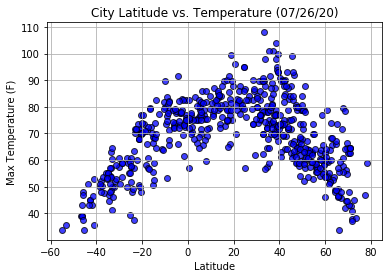

In [10]:
from datetime import date

latitudes = city_df["Lat"]
today = date.today()
todays_date = today.strftime("%m/%d/%y")
temperatures = city_df["Max Temp"]
                       
plt.scatter(latitudes, temperatures, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs. Temperature ({todays_date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/lat_vs_temp.png")
plt.show()

As we approach the equator (0 Latitude) from both hemispheres, the max temperature trends upward. Given the season, higher temperatures may also seem higher in one hemisphere than the other.  This chart from July 2020 shows higher temperatures in the Northern Hemispher where it is summer.

## Latitude vs. Humidity Plot

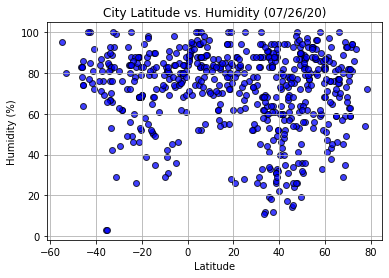

In [11]:
humidity_percents = city_df["Humidity"]
                       
plt.scatter(latitudes, humidity_percents, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs. Humidity ({todays_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/lat_vs_humidity.png")
plt.show()

There appears to be little correlation between latitude and humidity.  Very close to the equator (nearest 0 latitude), all locations in our dataset show humidity greater than 60%.

## Latitude vs. Cloudiness Plot

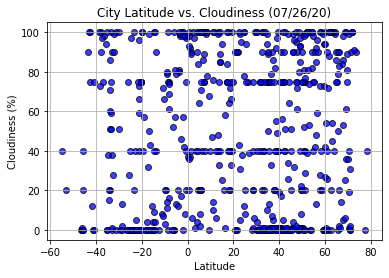

In [12]:
cloudiness = city_df["Cloudiness"]
                       
plt.scatter(latitudes, cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs. Cloudiness ({todays_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/lat_vs_cloudiness.png")
plt.show()

There appear to be no trends in cloudiness when looking at latitude.

## Latitude vs. Wind Speed Plot

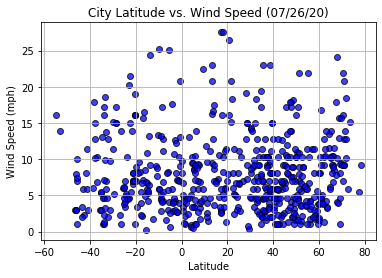

In [13]:
wind_speeds = city_df["Wind Speed"]
                       
plt.scatter(latitudes, wind_speeds, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs. Wind Speed ({todays_date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/lat_vs_wind.png")
plt.show()

Wind speed as compared to latitude also shows no discernable trends. In the northern hemisphere, there is perhaps a slight positive correlation between increased wind speed and higher latitudes.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def linregplot_function(x_values, y_values, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(0.05, 0.1), xycoords='axes fraction', fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"Images/{title}.png")
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi = city_df.loc[city_df["Lat"]>0]
southern_hemi = city_df.loc[city_df["Lat"]<0]
southern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,mar del plata,-38.00,-57.56,52.00,71,100,12.75,AR,1595800751
4,azul,-36.78,-59.86,47.52,69,98,6.87,AR,1595801014
5,busselton,-33.65,115.33,63.00,82,59,18.63,AU,1595801014
6,castro,-24.79,-50.01,57.54,88,97,3.42,BR,1595800818
9,kanigoro,-8.13,112.22,67.37,91,16,4.16,ID,1595801015


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.32530655039543344


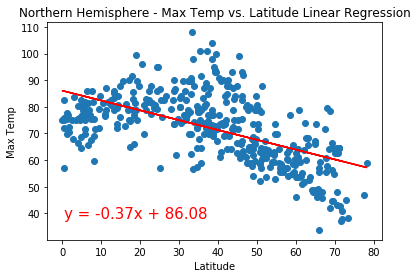

In [16]:
linregplot_function(northern_hemi["Lat"], northern_hemi["Max Temp"], "Max Temp", 
                    "Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.694937285892088


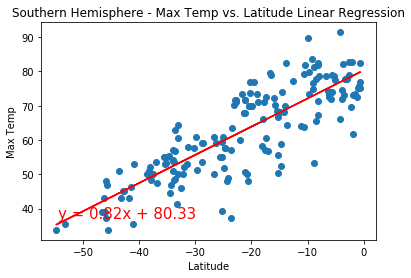

In [17]:
linregplot_function(southern_hemi["Lat"], southern_hemi["Max Temp"], "Max Temp", 
                   "Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

In both Southern and Northern Hemispheres, as you travel closer to the equator (0 latitude), the max temp increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.021509567320534335


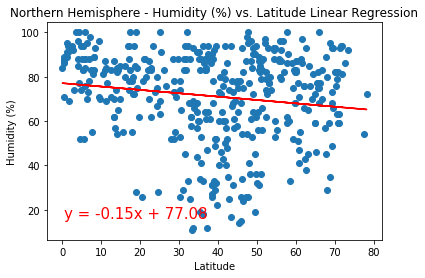

In [18]:
linregplot_function(northern_hemi["Lat"], northern_hemi["Humidity"], "Humidity (%)", 
                   "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0044580119351702654


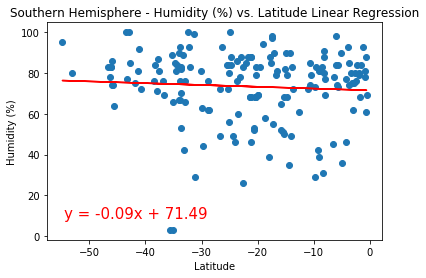

In [19]:
linregplot_function(southern_hemi["Lat"], southern_hemi["Humidity"], "Humidity (%)", 
                   "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

Humidity does not appear strongly correlated with latitude in either hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0002287507041839724


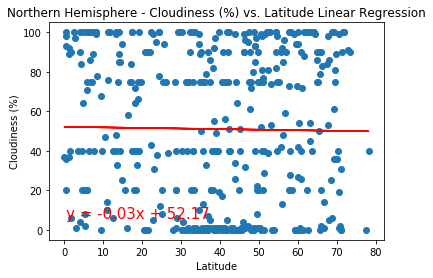

In [20]:
linregplot_function(northern_hemi["Lat"], northern_hemi["Cloudiness"], "Cloudiness (%)", 
                   "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005306974036715776


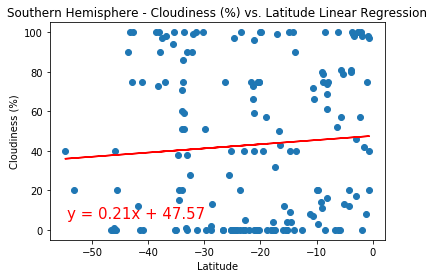

In [21]:
linregplot_function(southern_hemi["Lat"], southern_hemi["Cloudiness"], "Cloudiness (%)", 
                   "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

There is a slight correlation trending toward more cloudiness the closer one is to the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005334089881729212


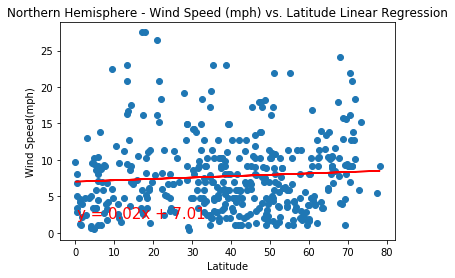

In [22]:
linregplot_function(northern_hemi["Lat"], northern_hemi["Wind Speed"], "Wind Speed(mph)", 
                   "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0005840068664788763


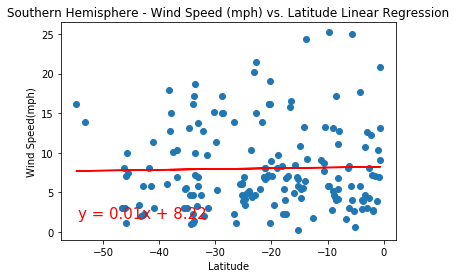

In [23]:
linregplot_function(southern_hemi["Lat"], southern_hemi["Wind Speed"], "Wind Speed(mph)", 
                   "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

Wind speed also does not appear any strong trends by latitude.  There is a slight increase in wind speed as one travels away from the equator.

OBSERVABLE TRENDS

The clearest weather component influenced by latitude is temperature.  Max temperatures trended higher as approaching the equator (0 latitude) from either hemisphere.  Humidity at (or very close to) the equator, also seems slightly higher (over 60% humidity) when compared to all data points.  Overall, cloudiness, humidity, and wind speed showed no significant rates of correlation when plotted against latitudes.